## Create a Simple App

Let’s create a simple app that geocodes a user query and displays the results on a map. We will use [OpenRouteService Geocoding API](https://openrouteservice.org/dev/#/api-docs/geocode) for geocoding and Folium to display the results on a map.

1. We start by creating a new folder `simple_app` and create the `app.py` with a basic layout with a title, a description and a text input for the address.

`app.py`

In [ ]:
import folium
import requests
import streamlit as st

st.title('A Simple Geocoder')
st.markdown('This app uses the [OpenRouteService API](https://openrouteservice.org/) '
    'to geocode the input address and display the results on a map.')
    
address = st.text_input('Enter an address.')

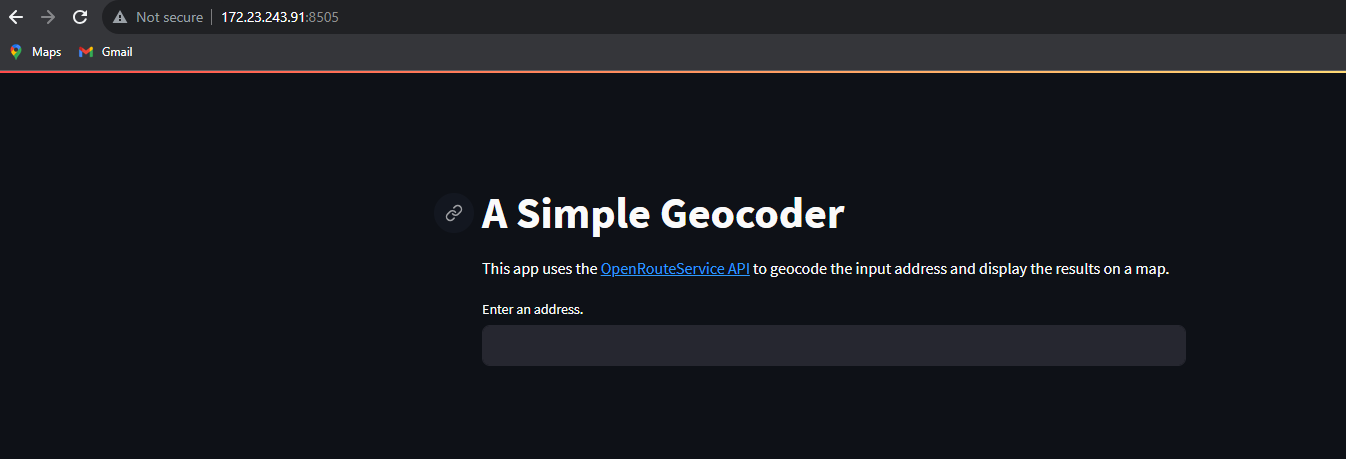

2. Now we add a `geocode()` function that will take an address and geocode it using OpenRouteService API.

`app.py`

In [ ]:
import requests
import streamlit as st

st.title('A Simple Geocoder')
st.markdown('This app uses the [OpenRouteService API](https://openrouteservice.org/) '
  'to geocode the input address and display the results on a map.')

address = st.text_input('Enter an address.')

ORS_API_KEY = '<your api key>'

@st.cache_data
def geocode(query):
    parameters = {
        'api_key': ORS_API_KEY,
        'text' : query
    }

    response = requests.get(
         'https://api.openrouteservice.org/geocode/search',
         params=parameters)
    if response.status_code == 200:
        data = response.json()
        if data['features']:
            x, y = data['features'][0]['geometry']['coordinates']
            return (y, x)
    
if address:
    results = geocode(address)
    if results:
        st.write('Geocoded Coordinates: {}, {}'.format(results[0], results[1]))
    else:
        st.error('Request failed. No results.')

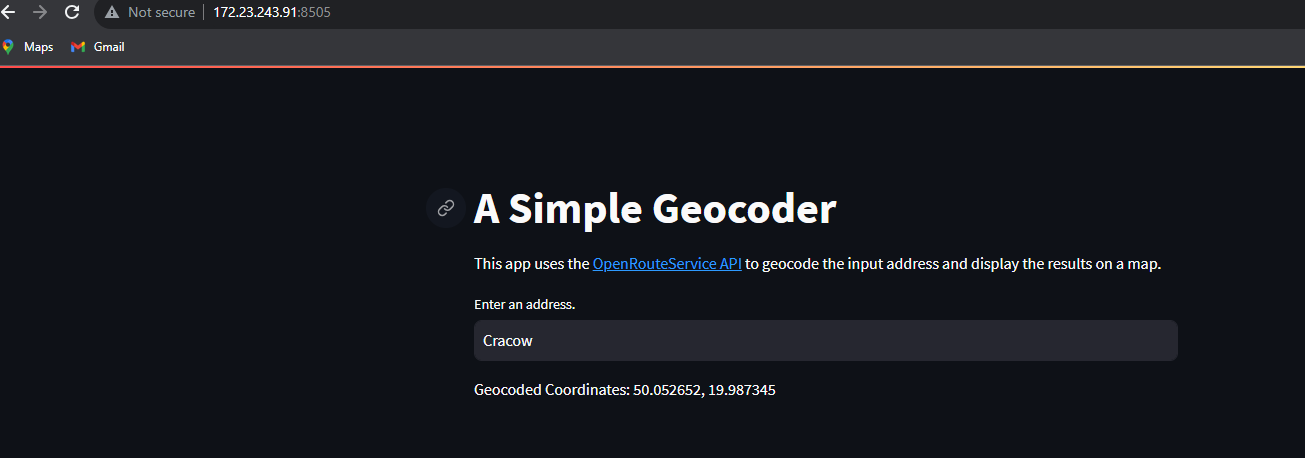

3. Now that we have coordinates, we can display it on a map using the streamlit_folium component.

`app.py`

In [ ]:
import folium
import requests
import streamlit as st
from streamlit_folium import folium_static

# Title / Intro
st.title('A Simple Geocoder')
st.markdown('This app uses the [OpenRouteService API](https://openrouteservice.org/) '
    'to geocode the input address and siplay the results on a map.')

# Prompt user to input an address
address = st.text_input('Enter an address.')  

ORS_API_KEY = '<your api key>'

# Customized map prodiction function
@st.cache_data
def geocode(query):
    parameters = {
        'api_key': ORS_API_KEY,
        'text' : query
    }

    response = requests.get(
         'https://api.openrouteservice.org/geocode/search',
         params=parameters)
    if response.status_code == 200:
        data = response.json()
        if data['features']:
            x, y = data['features'][0]['geometry']['coordinates']
            return (y, x) # folium coordinates follow unorthodox Y, X pattern
    
if address:
    results = geocode(address)
    if results:
        st.write('Geocoded Coordinates: {}, {}'.format(results[0], results[1]))
        
        m = folium.Map(location=results, zoom_start=8)
        folium.Marker(
                results,
                popup=address,
                icon=folium.Icon(color='green', icon='crosshairs', prefix='fa')
                ).add_to(m)
        folium_static(m, width=800)
        
    else:
        st.error('Request failed. No results.')

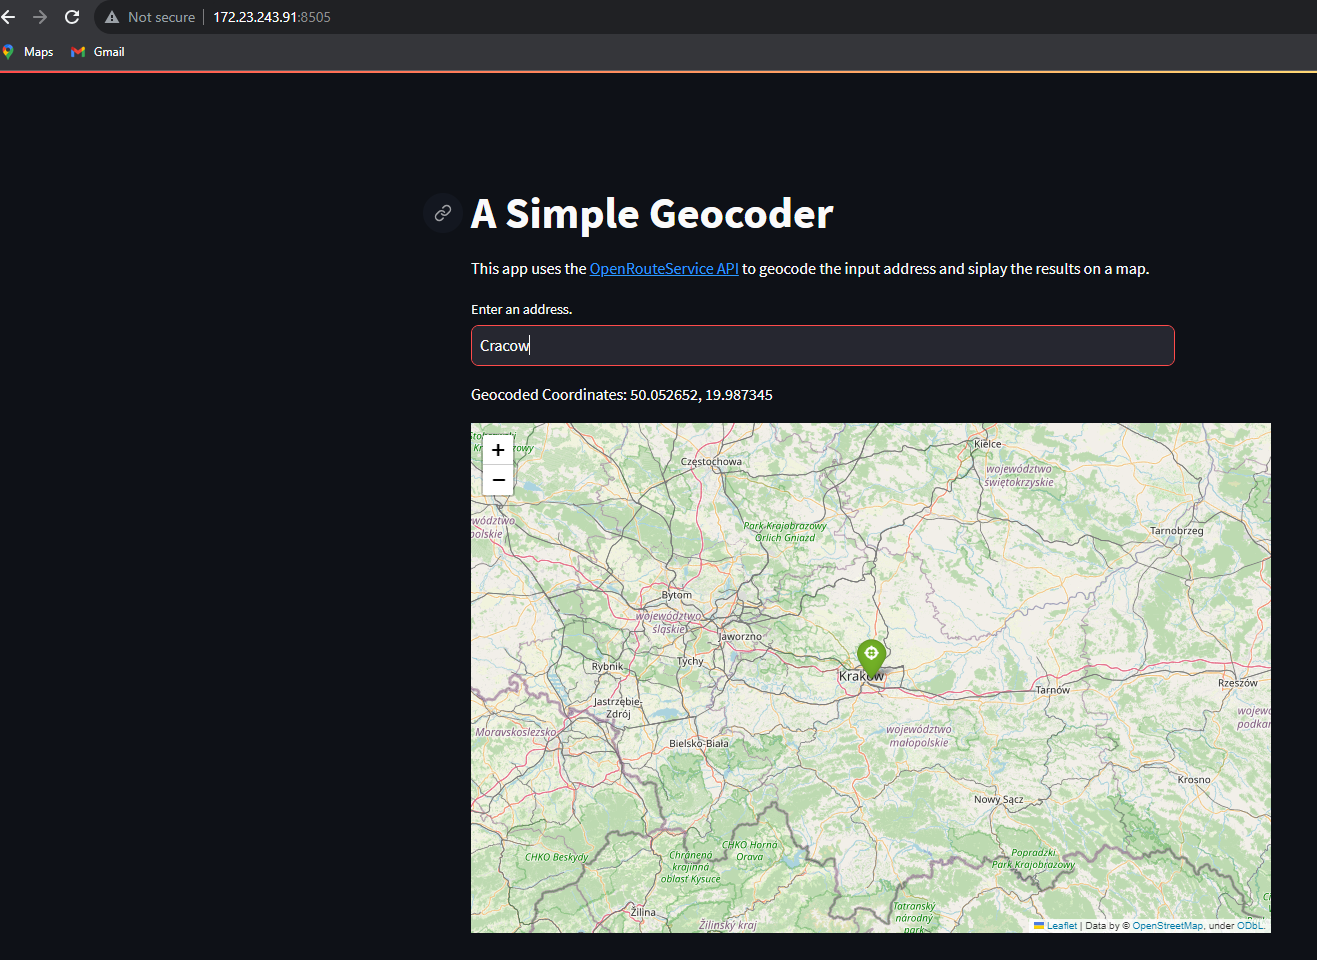

## Exercise

Add a dropdown menu to give the users an option to change the default basemap of the Folium map.

Hint: Add a `st.selectbox` with basemap strings. \
st.selectbox('Select a basemap', ['OpenStreetMap', 'Stamen Terrain', 'Stamen Toner'])

## My Solution

`app.py`

In [ ]:
import folium
import requests
import streamlit as st
from streamlit_folium import folium_static

# Title / Intro
st.title('A Simple Geocoder')
st.markdown('This app uses the [OpenRouteService API](https://openrouteservice.org/) '
    'to geocode the input address and siplay the results on a map.')

# Prompt user to input an address
address = st.text_input('Enter an address.')  

ORS_API_KEY = '<your api key>'

# Add a dropdown to enable user to choose type of basemap  
base_map = st.selectbox('Select a basemap', ['OpenStreetMap', 'Stamen Terrain', 'Stamen Toner'])

# Customized map prodiction function
@st.cache_data
def geocode(query):
    parameters = {
        'api_key': ORS_API_KEY,
        'text' : query
    }

    response = requests.get(
         'https://api.openrouteservice.org/geocode/search',
         params=parameters)
    if response.status_code == 200:
        data = response.json()
        if data['features']:
            x, y = data['features'][0]['geometry']['coordinates']
            return (y, x) # folium coordinates follow unorthodox Y, X pattern
    
if address:
    results = geocode(address)
    if results:
        st.write('Geocoded Coordinates: {}, {}'.format(results[0], results[1]))
        
        m = folium.Map(location=results, zoom_start=8, tiles=base_map) # based on user selection
        folium.Marker(
                results,
                popup=address,
                icon=folium.Icon(color='green', icon='crosshairs', prefix='fa')
                ).add_to(m)
        folium_static(m, width=800)         
    
    else:
        st.error('Request failed. No results.')

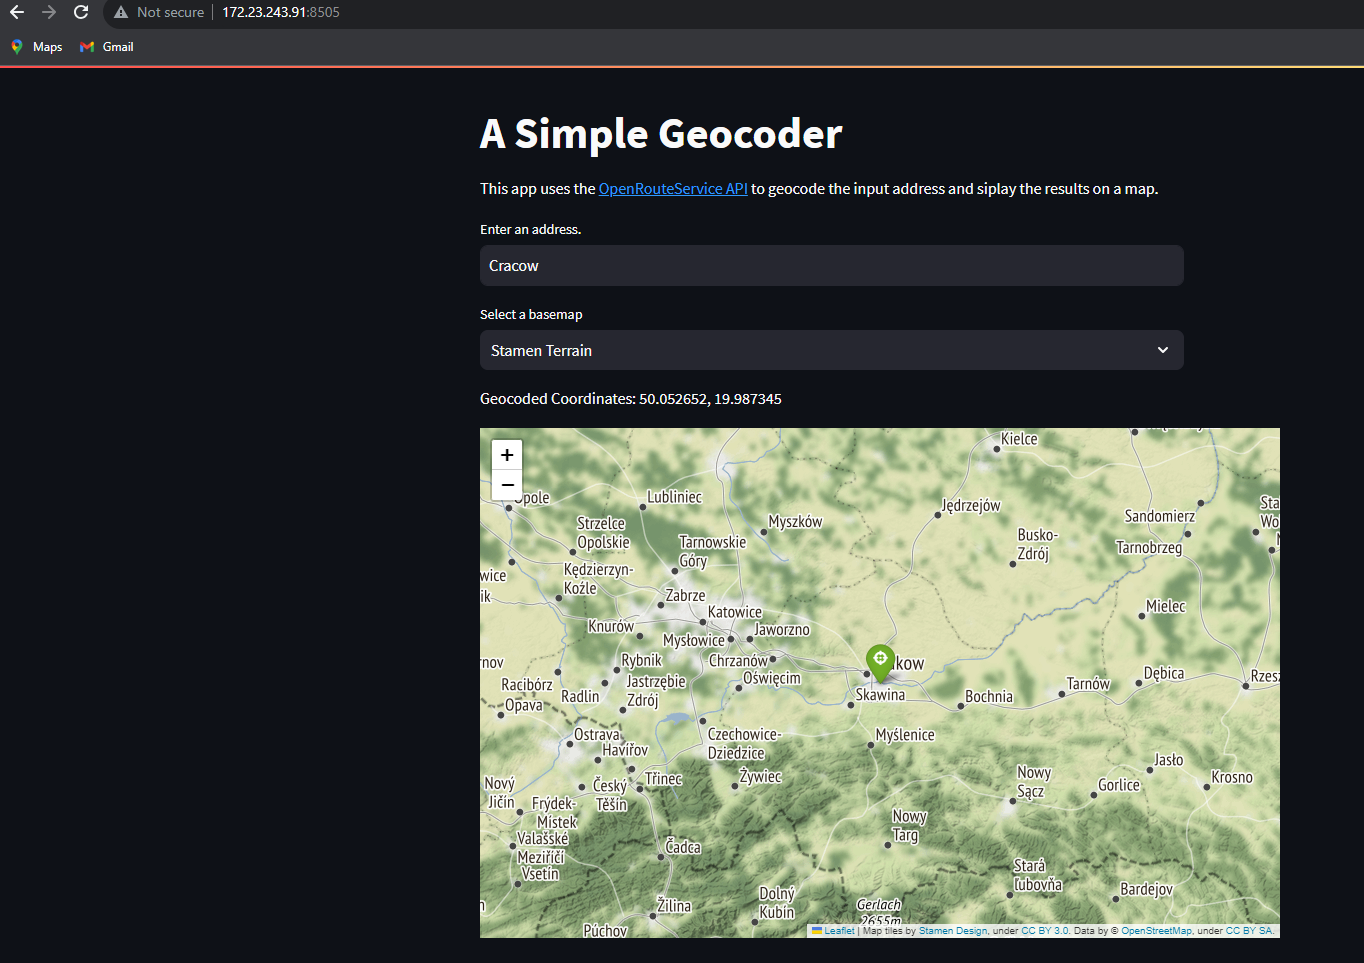